In [2]:
# Install necessary libraries (if not already installed)
# !pip install numpy pandas matplotlib scikit-learn seaborn

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load dataset
from sklearn.datasets import load_iris
data = load_iris()

# Convert to a DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


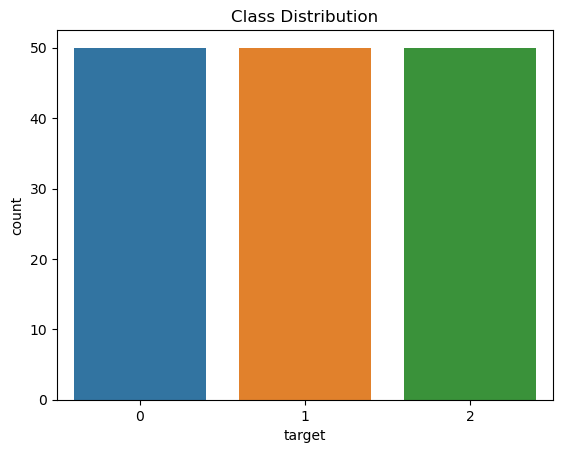

In [5]:
# Visualize the class distribution
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

In [6]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (SVM performs better with scaled data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Radial Basic Function(RBF): the RBF kernal is a popular choice for non-linear data.
#it maps data points into an infinite dimension space and measures their s
#similarity based on their distance.

rbf - Radial Basis Function
When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C,
common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a
single training example has. The larger gamma is, the closer other examples must be to be affected.

ValueError: X has 2 features, but SVC is expecting 4 features as input.

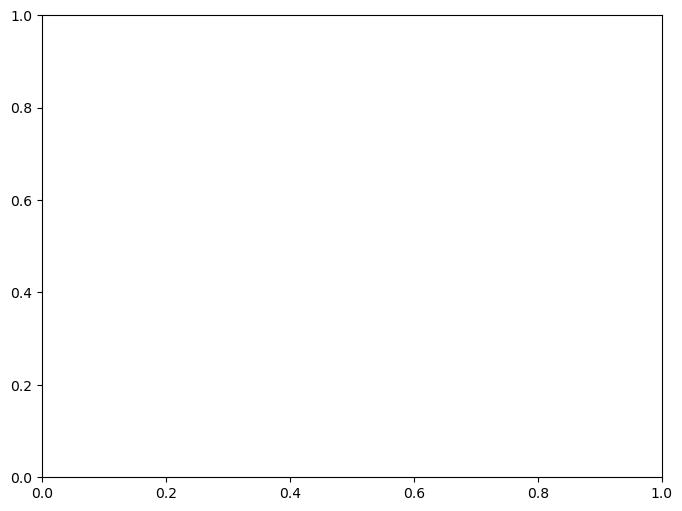

In [17]:
# Initialize the SVM model (choose kernel as 'linear', 'rbf', or 'poly')
svm_model = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
# Plot decision boundary
plt.figure(figsize=(8, 6))
xlim = plt.xlim()
ylim = plt.ylim()

# Create grid for plotting
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)



In [16]:
# Evaluate using metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0


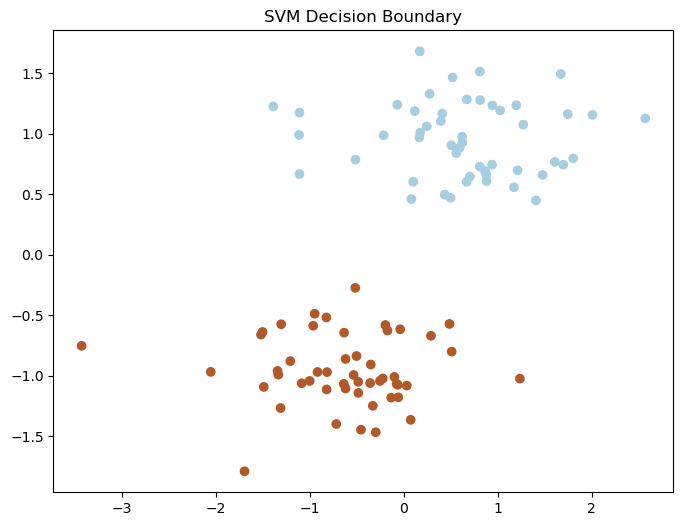

In [21]:
# Visualize decision boundaries (only for 2D features)
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X = scaler.fit_transform(X)

# Train a simple SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))
xlim = plt.xlim()
ylim = plt.ylim()


xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary")
plt.show()


In [14]:
# Experiment with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("Accuracy with Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))




Accuracy with Polynomial Kernel: 0.9555555555555556
